# David Lewis - Preparation for Imaging 2458140
To continue with the investigation into observation 2458140, it has been decided to image the evening in very small increments. The evening's observations were originally split up into 10-minute intervals, but have been further split up to the 10-second integration times that make up each observation. These will be turned into images, and then we can inspect them for RFI.

But first we have to determine where the Sun is during the course of this observation set, and avoid those time periods.

In [2]:
#import dependencies
from astropy.time import Time
from astropy import coordinates as coord
from astropy import units as u
from pyuvdata import UVData
import numpy as np
from numpy import ndarray
import itertools
import numpy.ma as ma
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import sys
import os
from hera_qm import xrfi as xrfi

np.set_printoptions(threshold='nan')

So here's the plan:

First, import a list of filenames<br />
Then take the date and time of the observation from the filename.<br />
For that date and time, find the sun.<br />
Calculate the angle between zenith and the sun<br />
If the sun is above the horizon, mark that observation as bad for imaging.<br />
Return a table of observations marked as imageable or not.<br />

In [3]:
#intit arrays
file_arr=[]
time_arr=[]
JD_arr=[]

file_arr=glob('/data6/HERA/data/2458140/time_split_uvOR/*.uvfits') #get a file list
file_arr.sort()
for i in range(len(file_arr)):
    time_arr.append(file_arr[i][23:-18]) #split that sucker up and put into new list
timefloat=[float(i) for i in time_arr]

In [4]:
print(time_arr)
print(timefloat)

['2458140.12564', '2458140.12577', '2458140.12589', '2458140.12602', '2458140.12614', '2458140.12627', '2458140.12639', '2458140.12651', '2458140.12664', '2458140.12676', '2458140.12689', '2458140.12701', '2458140.12714', '2458140.12726', '2458140.12738', '2458140.12751', '2458140.12763', '2458140.12776', '2458140.12788', '2458140.12801', '2458140.12813', '2458140.12825', '2458140.12838', '2458140.12850', '2458140.12863', '2458140.12875', '2458140.12888', '2458140.12900', '2458140.12912', '2458140.12925', '2458140.12937', '2458140.12950', '2458140.12962', '2458140.12975', '2458140.12987', '2458140.12999', '2458140.13012', '2458140.13024', '2458140.13037', '2458140.13049', '2458140.13062', '2458140.13074', '2458140.13086', '2458140.13099', '2458140.13111', '2458140.13124', '2458140.13136', '2458140.13149', '2458140.13161', '2458140.13173', '2458140.13186', '2458140.13198', '2458140.13211', '2458140.13223', '2458140.13236', '2458140.13248', '2458140.13260', '2458140.13273', '2458140.1328

In [5]:
#convert JD dates to sidereal
for item in time_arr:
    JD_arr.append(float(item))

date_arr=Time(JD_arr,format='jd',scale='utc')
lst_arr=date_arr.sidereal_time('apparent','21d25m39.0s')
print(lst_arr)

[u'0h30m20.356s' u'0h30m31.6187s' u'0h30m42.0151s' u'0h30m53.2778s'
 u'0h31m03.6742s' u'0h31m14.937s' u'0h31m25.3333s' u'0h31m35.7297s'
 u'0h31m46.9925s' u'0h31m57.3889s' u'0h32m08.6516s' u'0h32m19.048s'
 u'0h32m30.3108s' u'0h32m40.7071s' u'0h32m51.1035s' u'0h33m02.3663s'
 u'0h33m12.7627s' u'0h33m24.0254s' u'0h33m34.4218s' u'0h33m45.6846s'
 u'0h33m56.081s' u'0h34m06.4773s' u'0h34m17.7401s' u'0h34m28.1365s'
 u'0h34m39.3992s' u'0h34m49.7956s' u'0h35m01.0584s' u'0h35m11.4548s'
 u'0h35m21.8511s' u'0h35m33.1139s' u'0h35m43.5103s' u'0h35m54.773s'
 u'0h36m05.1694s' u'0h36m16.4321s' u'0h36m26.8285s' u'0h36m37.2249s'
 u'0h36m48.4877s' u'0h36m58.8841s' u'0h37m10.1468s' u'0h37m20.5432s'
 u'0h37m31.806s' u'0h37m42.2023s' u'0h37m52.5987s' u'0h38m03.8615s'
 u'0h38m14.2579s' u'0h38m25.5206s' u'0h38m35.917s' u'0h38m47.1798s'
 u'0h38m57.5761s' u'0h39m07.9725s' u'0h39m19.2353s' u'0h39m29.6317s'
 u'0h39m40.8944s' u'0h39m51.2908s' u'0h40m02.5536s' u'0h40m12.95s'
 u'0h40m23.3463s' u'0h40m34.6091s' u'0h40m4

In [6]:
print(date_arr)

[ 2458140.12564  2458140.12577  2458140.12589  2458140.12602  2458140.12614
  2458140.12627  2458140.12639  2458140.12651  2458140.12664  2458140.12676
  2458140.12689  2458140.12701  2458140.12714  2458140.12726  2458140.12738
  2458140.12751  2458140.12763  2458140.12776  2458140.12788  2458140.12801
  2458140.12813  2458140.12825  2458140.12838  2458140.1285   2458140.12863
  2458140.12875  2458140.12888  2458140.129    2458140.12912  2458140.12925
  2458140.12937  2458140.1295   2458140.12962  2458140.12975  2458140.12987
  2458140.12999  2458140.13012  2458140.13024  2458140.13037  2458140.13049
  2458140.13062  2458140.13074  2458140.13086  2458140.13099  2458140.13111
  2458140.13124  2458140.13136  2458140.13149  2458140.13161  2458140.13173
  2458140.13186  2458140.13198  2458140.13211  2458140.13223  2458140.13236
  2458140.13248  2458140.1326   2458140.13273  2458140.13285  2458140.13298
  2458140.1331   2458140.13323  2458140.13335  2458140.13347  2458140.1336
  2458140.133

In [7]:
sun_Arr=coord.get_sun(date_arr)

In [8]:
print(sun_Arr)

<SkyCoord (GCRS: obstime=[ 2458140.12564  2458140.12577  2458140.12589  2458140.12602  2458140.12614
  2458140.12627  2458140.12639  2458140.12651  2458140.12664  2458140.12676
  2458140.12689  2458140.12701  2458140.12714  2458140.12726  2458140.12738
  2458140.12751  2458140.12763  2458140.12776  2458140.12788  2458140.12801
  2458140.12813  2458140.12825  2458140.12838  2458140.1285   2458140.12863
  2458140.12875  2458140.12888  2458140.129    2458140.12912  2458140.12925
  2458140.12937  2458140.1295   2458140.12962  2458140.12975  2458140.12987
  2458140.12999  2458140.13012  2458140.13024  2458140.13037  2458140.13049
  2458140.13062  2458140.13074  2458140.13086  2458140.13099  2458140.13111
  2458140.13124  2458140.13136  2458140.13149  2458140.13161  2458140.13173
  2458140.13186  2458140.13198  2458140.13211  2458140.13223  2458140.13236
  2458140.13248  2458140.1326   2458140.13273  2458140.13285  2458140.13298
  2458140.1331   2458140.13323  2458140.13335  2458140.13347  2

In [9]:
testdate=Time(JD_arr[693], format='jd',scale='utc')
print(coord.get_sun(testdate))

<SkyCoord (GCRS: obstime=2458140.21177, obsgeoloc=( 0.,  0.,  0.) m, obsgeovel=( 0.,  0.,  0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    ( 303.59356453, -19.85492309,  0.98416333)>


In [10]:
anglediff_arr=date_arr[:].sidereal_time('apparent','21d25m39.0s').deg-sun_Arr.ra.deg
print(anglediff_arr)

[-295.91782636 -295.87103563 -295.82784405 -295.78105315 -295.73786157
 -295.69107067 -295.64787909 -295.60468752 -295.55789661 -295.51470504
 -295.46791414 -295.42472256 -295.37793166 -295.33474008 -295.2915485
 -295.2447576  -295.20156602 -295.15477512 -295.11158354 -295.06479264
 -295.02160106 -294.97840949 -294.93161858 -294.88842701 -294.8416361
 -294.79844452 -294.75165362 -294.70846204 -294.66527047 -294.61847956
 -294.57528799 -294.52849725 -294.48530567 -294.43851477 -294.39532319
 -294.35213161 -294.30534071 -294.26214913 -294.21535823 -294.17216665
 -294.12537574 -294.08218417 -294.03899259 -293.99220168 -293.94901011
 -293.9022192  -293.85902762 -293.81223672 -293.76904514 -293.72585356
 -293.67906266 -293.63587108 -293.58908017 -293.54588859 -293.49909769
 -293.45590611 -293.41271453 -293.36592363 -293.32273205 -293.27594114
 -293.23274956 -293.18595883 -293.14276725 -293.09957567 -293.05278476
 -293.00959318 -292.96280228 -292.9196107  -292.87281979 -292.82962821
 -292.78

In [11]:
date_arr[639].sidereal_time('apparent','21d25m39.0s').deg

36.254294847316636

In [12]:
sun_Arr[639].ra.deg

303.58648209113557

In [13]:
sunangle_arr=np.mod(anglediff_arr,360)

In [14]:
print(sunangle_arr)

[  64.08217364   64.12896437   64.17215595   64.21894685   64.26213843
   64.30892933   64.35212091   64.39531248   64.44210339   64.48529496
   64.53208586   64.57527744   64.62206834   64.66525992   64.7084515
   64.7552424    64.79843398   64.84522488   64.88841646   64.93520736
   64.97839894   65.02159051   65.06838142   65.11157299   65.1583639
   65.20155548   65.24834638   65.29153796   65.33472953   65.38152044
   65.42471201   65.47150275   65.51469433   65.56148523   65.60467681
   65.64786839   65.69465929   65.73785087   65.78464177   65.82783335
   65.87462426   65.91781583   65.96100741   66.00779832   66.05098989
   66.0977808    66.14097238   66.18776328   66.23095486   66.27414644
   66.32093734   66.36412892   66.41091983   66.45411141   66.50090231
   66.54409389   66.58728547   66.63407637   66.67726795   66.72405886
   66.76725044   66.81404117   66.85723275   66.90042433   66.94721524
   66.99040682   67.03719772   67.0803893    67.12718021   67.17037179
   67.21

In [15]:
#Wow this part was a huge pain, astropy is picky about data and unit types
#Get the coordinates of the observation site, then using the sun coords from above return the alt and az

locate=coord.EarthLocation(lon=21.25*u.deg, lat=-30.33*u.deg) #important, does not like sidereal or ITRS for some reason
frameObs=coord.AltAz(obstime=date_arr, location=locate)
sunaltaz=sun_Arr.transform_to(frameObs)
print(sunaltaz)

<SkyCoord (AltAz: obstime=[ 2458140.12564  2458140.12577  2458140.12589  2458140.12602  2458140.12614
  2458140.12627  2458140.12639  2458140.12651  2458140.12664  2458140.12676
  2458140.12689  2458140.12701  2458140.12714  2458140.12726  2458140.12738
  2458140.12751  2458140.12763  2458140.12776  2458140.12788  2458140.12801
  2458140.12813  2458140.12825  2458140.12838  2458140.1285   2458140.12863
  2458140.12875  2458140.12888  2458140.129    2458140.12912  2458140.12925
  2458140.12937  2458140.1295   2458140.12962  2458140.12975  2458140.12987
  2458140.12999  2458140.13012  2458140.13024  2458140.13037  2458140.13049
  2458140.13062  2458140.13074  2458140.13086  2458140.13099  2458140.13111
  2458140.13124  2458140.13136  2458140.13149  2458140.13161  2458140.13173
  2458140.13186  2458140.13198  2458140.13211  2458140.13223  2458140.13236
  2458140.13248  2458140.1326   2458140.13273  2458140.13285  2458140.13298
  2458140.1331   2458140.13323  2458140.13335  2458140.13347  

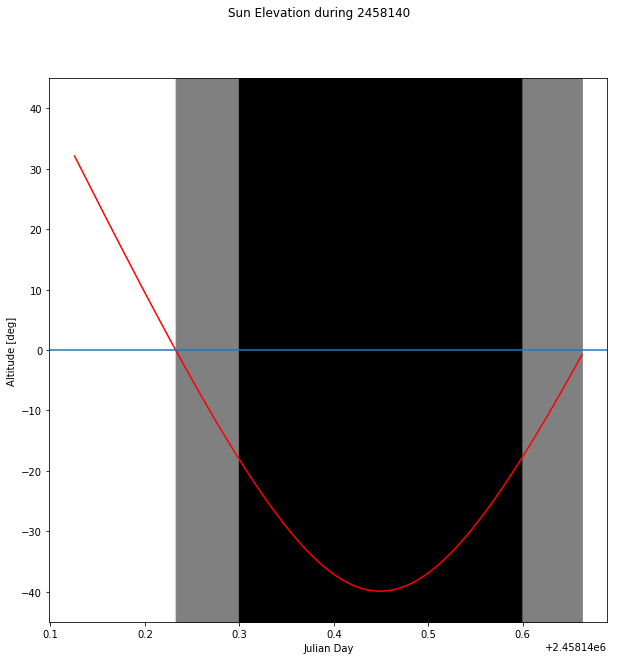

In [28]:
#But it gives us a plot of the sun altitude! Note the 18 degree allowance for astronomical twilight.
plt.figure(figsize=[10,10])
plt.plot(timefloat,sunaltaz.alt, color='r')
plt.fill_between(timefloat, -45, 45, sunaltaz.alt < -0*u.deg, color='0.5', zorder=0) #sun below horizon
plt.fill_between(timefloat, -45, 45, sunaltaz.alt < -18*u.deg, color='k', zorder=0) #twilight
plt.axhline()
plt.ylim(-45, 45)
plt.xlabel('Julian Day')
plt.ylabel('Altitude [deg]')
plt.suptitle('Sun Elevation during 2458140')
plt.show()

In [64]:
goodtimes_ind=[]
for times in range(len(sunangle_arr)):
    if sunangle_arr[times]<280.0 and sunangle_arr[times]>100.0:
        goodtimes_ind.append([times])
        

In [65]:
goodtimes_ind=list(itertools.chain(*goodtimes_ind))
print(goodtimes_ind)


[803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 10

In [31]:
#take good indices, return observation list
sundown_arr=[]
#print(range(len(goodtimes_ind)))
for i in range(len(goodtimes_ind)):
    sundown_arr.append(JD_arr[goodtimes_ind[i]])
    
print(sundown_arr)

[2458140.19772, 2458140.19785, 2458140.19797, 2458140.1981, 2458140.19822, 2458140.19835, 2458140.19847, 2458140.19859, 2458140.19872, 2458140.19884, 2458140.19897, 2458140.19909, 2458140.19922, 2458140.19934, 2458140.19946, 2458140.19959, 2458140.19971, 2458140.19984, 2458140.19996, 2458140.20009, 2458140.20021, 2458140.20033, 2458140.20046, 2458140.20058, 2458140.20071, 2458140.20083, 2458140.20096, 2458140.20108, 2458140.2012, 2458140.20133, 2458140.20145, 2458140.20158, 2458140.2017, 2458140.20183, 2458140.20195, 2458140.20207, 2458140.2022, 2458140.20232, 2458140.20245, 2458140.20257, 2458140.2027, 2458140.20282, 2458140.20294, 2458140.20307, 2458140.20319, 2458140.20332, 2458140.20344, 2458140.20357, 2458140.20369, 2458140.20381, 2458140.20394, 2458140.20406, 2458140.20419, 2458140.20431, 2458140.20444, 2458140.20456, 2458140.20468, 2458140.20481, 2458140.20493, 2458140.20506, 2458140.20518, 2458140.20531, 2458140.20543, 2458140.20555, 2458140.20568, 2458140.2058, 2458140.20593, 

In [103]:
print(sundown_arr[len(sundown_arr)/4]) 

2458140.31392


We now have our list of valid observations, and we can continue our analysis appropriately. This will involve the calibration of .uv files using existing .calfits files, and then the subsequent creation of images using those UV files. With these images, we can check for any RFI sources visually.

In [104]:
tdate=2458140.31392 #first good time of the night
testdate=Time(tdate,format='jd',scale='utc')
sdate=testdate.sidereal_time('apparent','21d25m39.0s')
print (sdate)

5h02m12.2856s


In [111]:
#compare this to 2458042
tdate2=2458042.58150 #similar time of night
testdate2=Time(tdate2,format='jd',scale='utc')
sdate2=testdate2.sidereal_time('apparent','21d25m39.0s')
print (sdate2)

5h02m12.1021s


In [113]:
print(range(15,20))

[15, 16, 17, 18, 19]


In [114]:
for files in range(15, 20):
    print(files)

15
16
17
18
19
